In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import mixture
from tqdm import tqdm
from sklearn import metrics

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

<Figure size 432x288 with 0 Axes>

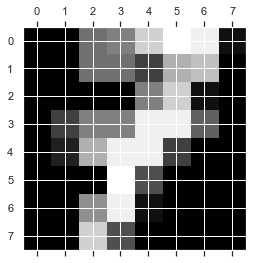

In [25]:
plt.gray()
plt.matshow(digits.images[7])

plt.show()

<Figure size 432x288 with 0 Axes>

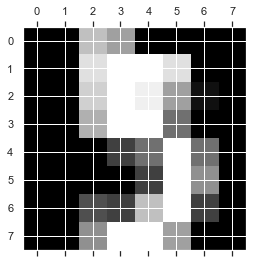

In [26]:
plt.gray()
plt.matshow(digits.images[5])

plt.show()

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)


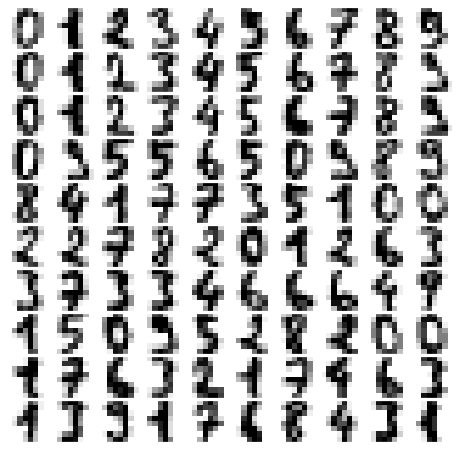

In [7]:
plot_digits(digits.data)

n =  [ 50  60  70  80  90 100 110 120 130 140 150 160 170 180 190 200 210 220
 230 240]


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:31<00:00,  1.60s/it]


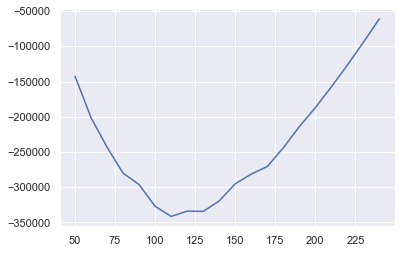

In [8]:
n_components = np.arange(50, 250, 10)
print('n = ',n_components)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0) for n in tqdm(n_components)]
aics = [model.fit(digits.data, digits.target).aic(digits.data) for model in tqdm(models)]
plt.plot(n_components, aics)

In [9]:
gmm = mixture.GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(digits.data, digits.target)
print(gmm.converged_)

True


In [10]:
data_new1 = gmm.sample(100)
data_new1[0].shape

(100, 64)

In [11]:
data_new1

(array([[-1.99077882e-03,  4.83510495e-01,  4.13320861e+00, ...,
          1.12821693e+01,  1.38224401e+00,  2.22259902e-04],
        [ 1.03935912e-04,  2.41634807e-04, -4.47299751e-01, ...,
          3.96940812e-01,  2.45210593e-01,  9.01127910e-05],
        [ 3.62597417e-05, -1.39119312e-03,  5.17551456e+00, ...,
          1.21430565e+00, -3.91910836e-01, -1.73742924e-03],
        ...,
        [ 1.34809478e-03,  9.27641416e-01,  1.17199575e+01, ...,
          1.53480291e+01,  1.04652406e+01,  6.16202146e-01],
        [ 6.74449091e-05,  3.28998879e-01,  6.91518210e+00, ...,
         -1.59813155e-03,  4.72727594e-04, -4.87502176e-04],
        [ 1.04984076e-04, -3.46184429e-01,  5.11619988e+00, ...,
          1.48018919e+01,  9.61605025e+00, -6.31796059e-04]]),
 array([  0,   1,   1,   1,   2,   3,   5,   7,   7,   8,   8,  11,  12,
         13,  13,  17,  17,  18,  18,  18,  19,  19,  20,  20,  20,  21,
         23,  25,  27,  27,  27,  28,  31,  33,  35,  35,  36,  38,  38,
         3

In [12]:
y_pred = gmm.predict(digits.data)
metrics.rand_score(digits.target, y_pred)

0.9099805045032986

In [13]:
gmm.score(data_new1[0], data_new1[1])

202.92422164683236

In [14]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

n =  [ 50  60  70  80  90 100 110 120 130 140 150 160 170 180 190 200]


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:16<00:00,  1.00s/it]


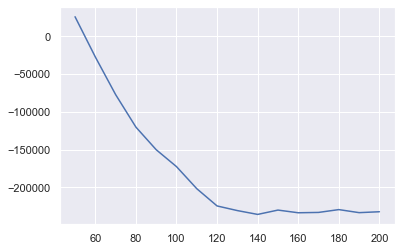

In [15]:
n_components = np.arange(50, 210, 10)
print('n = ',n_components)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0)
          for n in tqdm(n_components)]
aics = [model.fit(data).aic(data) for model in tqdm(models)]
plt.plot(n_components, aics)

In [16]:
gmm = mixture.GaussianMixture(140, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [17]:
data_new2 = gmm.sample(100)
data_new2[0].shape

(100, 41)

In [18]:
data_new2

(array([[ 0.21373229, -0.65765696, -2.02265263, ...,  1.38813484,
         -1.15338027,  0.06626494],
        [ 0.47631967,  1.48640339,  0.10374943, ..., -0.51256824,
         -1.11743423, -1.09658686],
        [ 2.02605585,  0.41537015, -1.0342151 , ..., -0.8191886 ,
         -0.12424497, -0.37363683],
        ...,
        [ 1.7757127 ,  0.06356635, -0.96516986, ..., -0.54663062,
         -0.64044953, -0.12301548],
        [-1.86544003,  0.24642756,  0.02647081, ..., -1.10500696,
         -0.36639774,  0.34805859],
        [ 0.37227187,  1.17398286, -0.50376443, ...,  1.28792462,
          0.09107421, -0.5663932 ]]),
 array([  1,   2,   3,   4,   5,   6,   7,   7,   8,   8,   8,   9,  10,
         10,  11,  13,  13,  17,  17,  18,  18,  19,  20,  20,  21,  22,
         23,  25,  27,  31,  32,  35,  37,  38,  38,  38,  39,  40,  42,
         44,  45,  49,  50,  52,  52,  52,  56,  66,  66,  68,  68,  68,
         70,  70,  70,  70,  71,  72,  72,  72,  74,  80,  81,  88,  89,
        

In [19]:
data_new2[1].shape

(100,)

In [20]:
y_pred = gmm.predict(data)
metrics.rand_score(digits.target, y_pred)

0.9072414677766582

In [21]:
gmm.score(data_new2[0], data_new2[1])

123.0457126220015

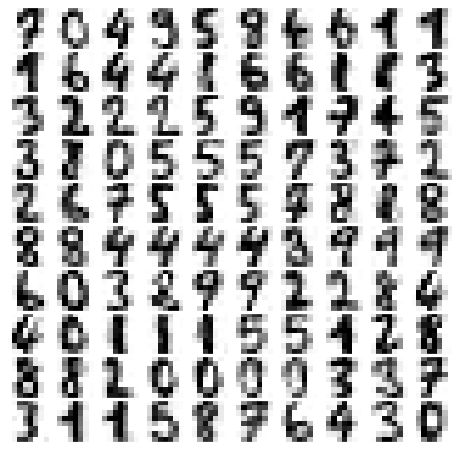

In [22]:
digits_new = pca.inverse_transform(data_new2[0])
plot_digits(digits_new)